In [401]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [402]:
os.getcwd()

'/home/vizziwo/otherprojects'

In [403]:
df = pd.read_csv('adult.csv')

In [404]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [405]:
df.shape

(48842, 15)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Removing Null Values

In [407]:
df.replace('?', np.nan, inplace=True)

In [408]:
df.dropna(inplace=True)

#### Correlation 

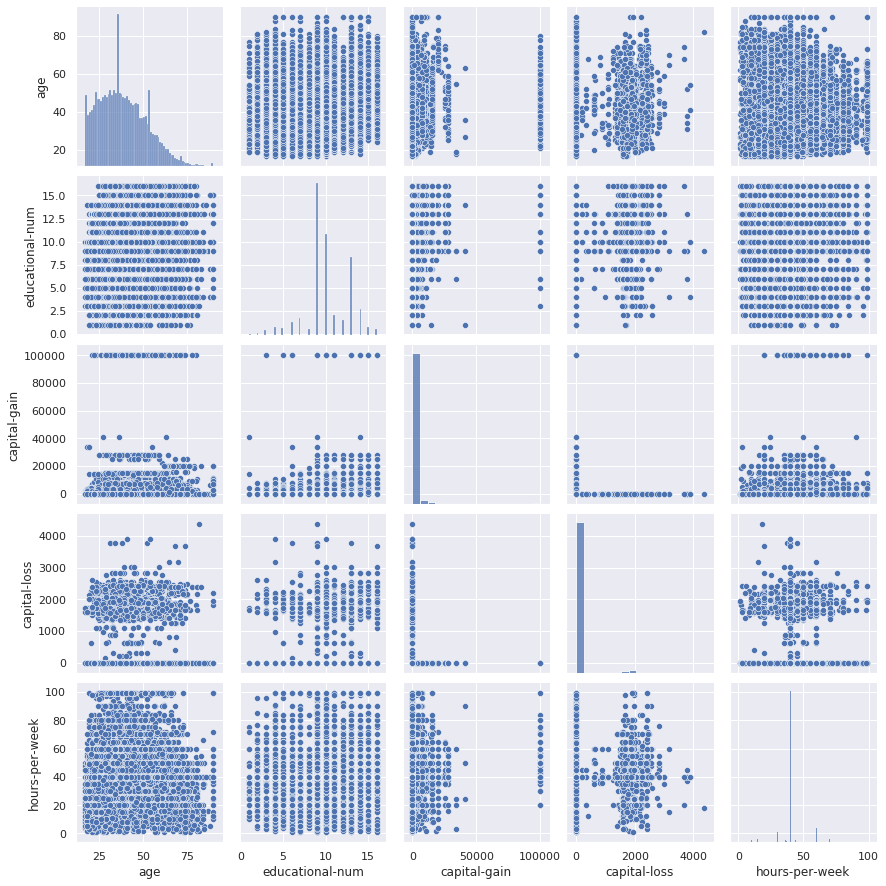

In [409]:
sns.pairplot(df.drop('fnlwgt', axis=1))

There isn't any clear correlation between educaiton, age, capital gain/loss, or hours worked.

## Does race, gender, education, or industry affect income?
#### Plotting differences among the income classes

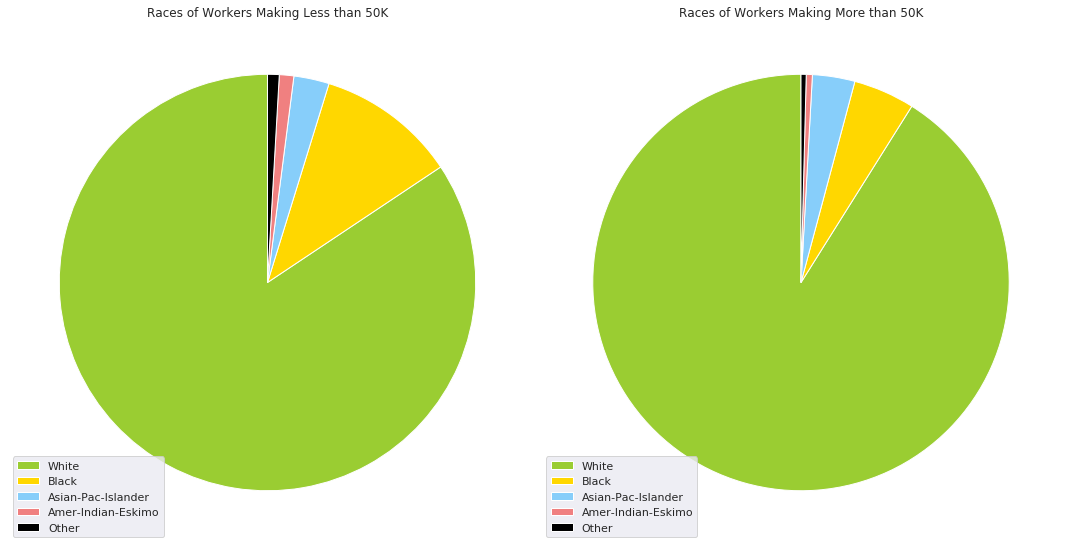

In [419]:
f, (ax1,ax2) = plt.subplots(1,2)
labels = df[df.income=='<=50K'].race.value_counts().index
sizes = df[df.income=='<=50K'].race.value_counts().values / 45222 * 100
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'black']
plt.subplot(1, 2, 1)
patches, text = plt.pie(sizes, colors=colors, shadow=False, startangle=90, radius =1)
plt.legend(patches, labels, loc="lower left")
plt.title('Races of Workers Making Less than 50K')

plt.subplot(1, 2, 2)
labels = df[df.income=='>50K'].race.value_counts().index
sizes = df[df.income=='>50K'].race.value_counts().values / 45222 * 100
patches2, text2 = plt.pie(sizes, colors=colors, shadow=False, startangle=90, radius=1)
plt.title('Races of Workers Making More than 50K')
plt.legend(patches2, labels, loc="lower left")
plt.tight_layout()

plt.show()

This does look like a shift in distribution. Asian and White increases, everything else decreases proportionally.

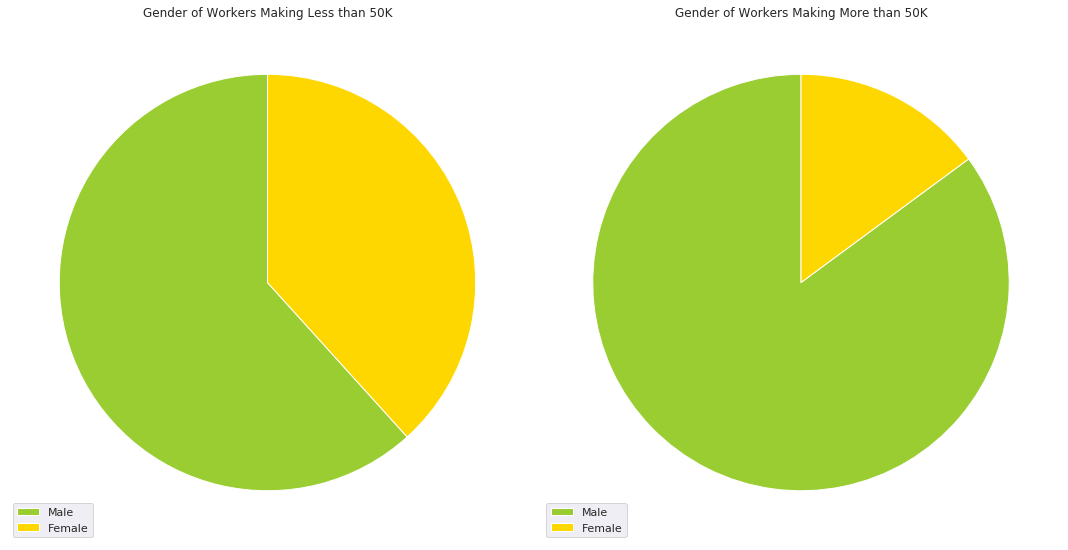

In [420]:
f, (ax1,ax2) = plt.subplots(1,2)
labels = df[df.income=='<=50K'].gender.value_counts().index
sizes = df[df.income=='<=50K'].gender.value_counts().values / 45222 * 100
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'black']
plt.subplot(1, 2, 1)
patches, text = plt.pie(sizes, colors=colors, shadow=False, startangle=90, radius =1)
plt.legend(patches, labels, loc="lower left")
plt.title('Gender of Workers Making Less than 50K')

plt.subplot(1, 2, 2)
labels = df[df.income=='>50K'].gender.value_counts().index
sizes = df[df.income=='>50K'].gender.value_counts().values / 45222 * 100
patches2, text2 = plt.pie(sizes, colors=colors, shadow=False, startangle=90, radius=1)
plt.title('Gender of Workers Making More than 50K')

plt.legend(patches2, labels, loc="lower left")
plt.tight_layout()
plt.show()

Women make a much lower proportion of high-income workers.

Is this due to chance? We can test to see if this shift is significant using bootstrapping.

# Workclass 

Text(0.5, 1.0, 'Workclass of Workers by Income Class')

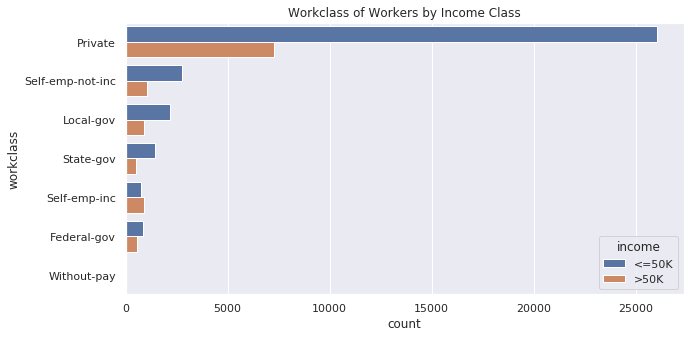

In [412]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, y='workclass', hue='income', orient='v', order=df.workclass.value_counts().index)
#.set_xticklabels(df['workclass'].unique(), rotation=90)
g.set_title('Workclass of Workers by Income Class')


Most workers are in private companies.

It looks like the breakdown among workclasses is not too dissimilar between income classes.

# Marital Status 

Text(0.5, 1.0, 'Marital Status of Workers by Income Class')

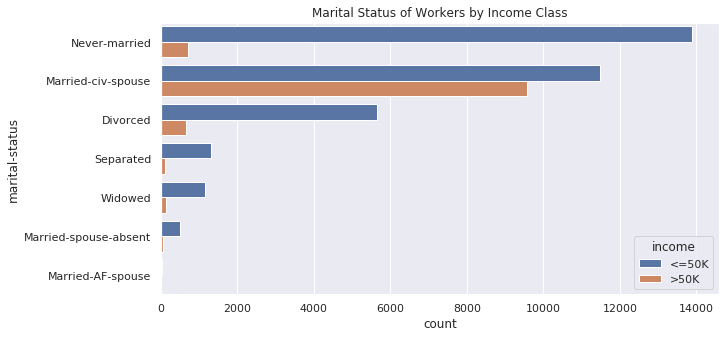

In [413]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, y='marital-status', hue='income', orient='v', order=df[df.income=='<=50K']['marital-status'].value_counts().index)
#g.set_xticklabels(df['marital-status'].unique(), rotation=90)
g.set_title('Marital Status of Workers by Income Class')

#### Big difference here in married and unmarried workers among the >50K crowd. Most are married, few are not.
#### Most high paid workers are married, but so few are divorced. Do married people with high incomes not divorce? Do people with high incomes opt for jobs/hours that pay less after divorce?

# Hours per Week 

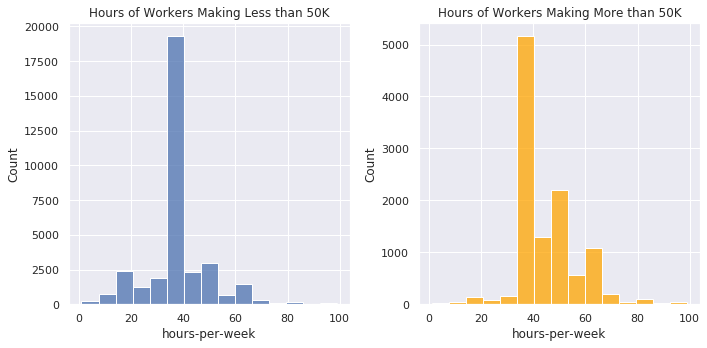

In [414]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data=df[df.income=='<=50K'], x='hours-per-week', bins=15, ax=ax1)
sns.histplot(data=df[df.income=='>50K'], x='hours-per-week', bins=15, ax=ax2, color='orange')
#g.set_xticklabels(df['hours-per-week'].unique(), rotation=90)
ax1.set_title('Hours of Workers Making Less than 50K')
ax2.set_title('Hours of Workers Making More than 50K')
plt.tight_layout()

Higher paid workers mostly work 45-60 hours. 

Most of <50k works 35-40 hours, with small numbers of workers who work more or less.

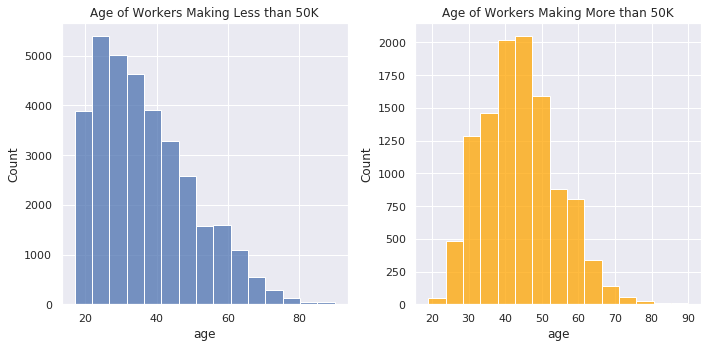

In [415]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data=df[df.income=='<=50K'], x='age', bins=15, ax=ax1)
sns.histplot(data=df[df.income=='>50K'], x='age', bins=15, ax=ax2, color='orange')
#g.set_xticklabels(df['hours-per-week'].unique(), rotation=90)
ax1.set_title('Age of Workers Making Less than 50K')
ax2.set_title('Age of Workers Making More than 50K')
plt.tight_layout()

Less than 50K is skewed towards younger ages with with most workers in the low-mid 20s.

More than 50K is concentrated among 40-50 year-olds but has many who are younger or older. 

Text(0.5, 1.0, 'Occupation of Workers by Income Class')

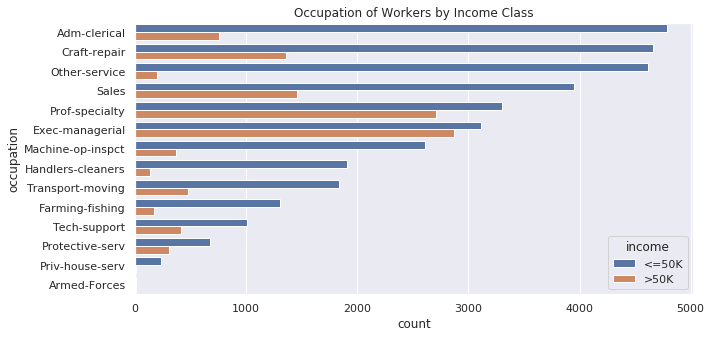

In [416]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, y='occupation', hue='income', orient='v', order=df[df.income == '<=50K'].occupation.value_counts().index)
g.set_title('Occupation of Workers by Income Class')

Most lower-paid workers are in Admin/ Craft/Service/Sales

Most higher-paid workers are in Professional Specialty, Exec/managerial.

# How do race and gender change across the income gap?

### Gender

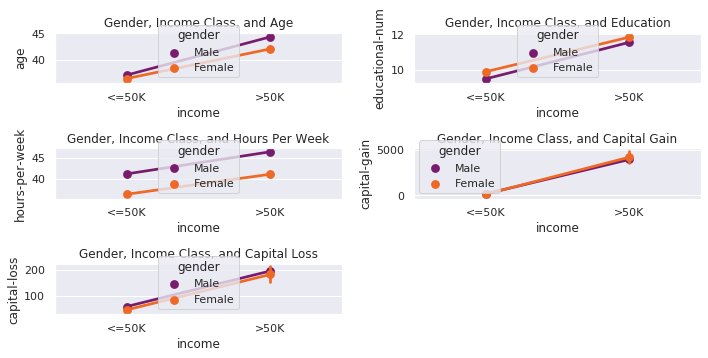

In [417]:
f, ax = plt.subplots(3,2)
sns.set(rc={'figure.figsize':(15, 15)})
plt.subplot(3,2,1)
sns.pointplot(x="income", y="age", hue="gender",
                   data=df, dodge=False, palette='inferno')
plt.title("Gender, Income Class, and Age")

plt.subplot(3,2,2)

sns.pointplot(x="income", y="educational-num", hue="gender",
                   data=df, dodge=False, palette='inferno')


plt.title("Gender, Income Class, and Education")

plt.subplot(3,2,3)

sns.pointplot(x="income", y="hours-per-week", hue="gender",
                   data=df, dodge=False, palette='inferno')


plt.title("Gender, Income Class, and Hours Per Week")

plt.subplot(3,2,4)

sns.pointplot(x="income", y="capital-gain", hue="gender",
                   data=df, dodge=False, palette='inferno')


plt.title("Gender, Income Class, and Capital Gain")

plt.subplot(3,2,5)

sns.pointplot(x="income", y="capital-loss", hue="gender",
                   data=df, dodge=False, palette='inferno')


plt.title("Gender, Income Class, and Capital Loss")

f.delaxes(ax[2,1]) #The indexing is zero-based here
plt.tight_layout()

#### Men work more and are older. Women are more educated and have higher capital gain.

### Race

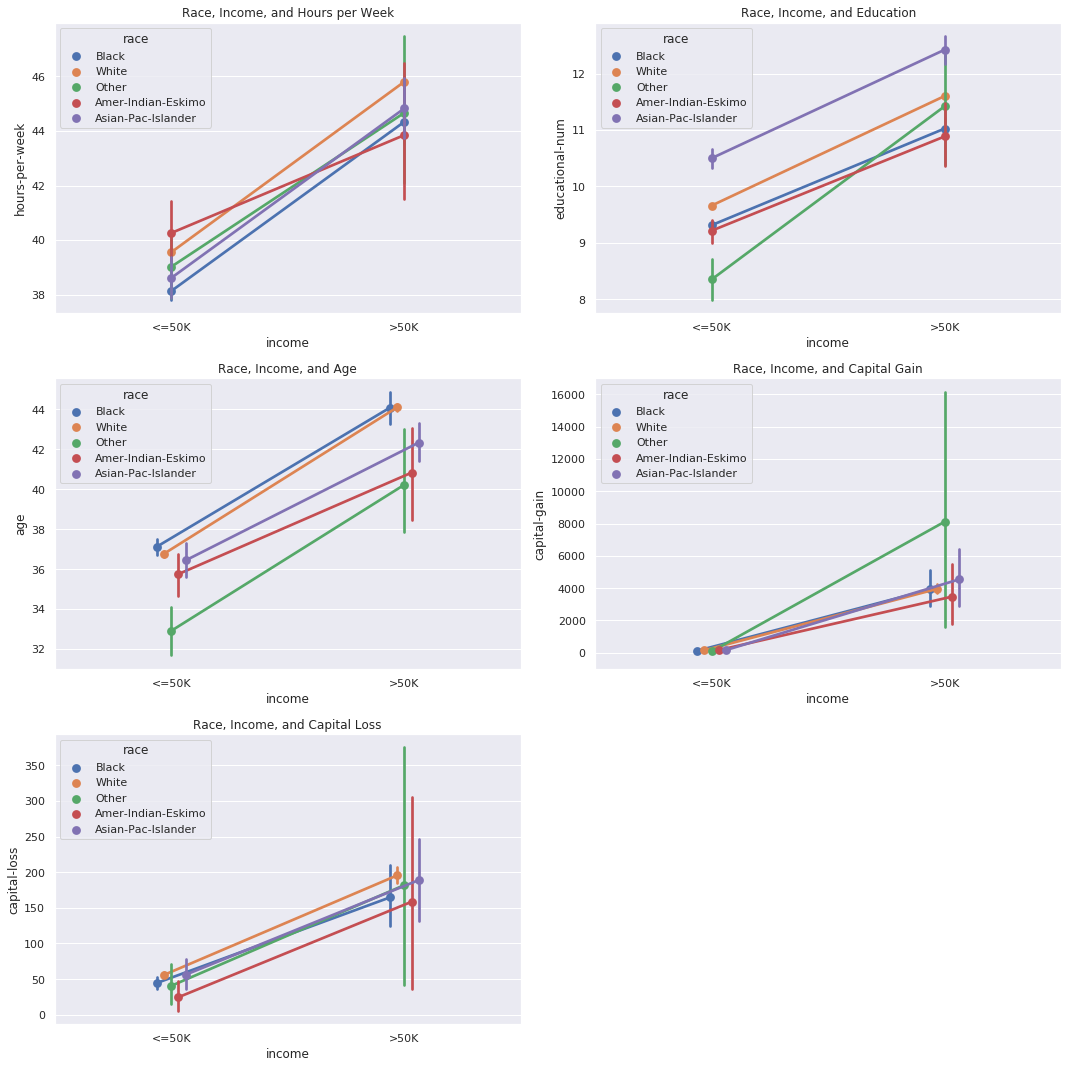

In [418]:
f, ax = plt.subplots(3,2)
sns.set(rc={'figure.figsize':(15,15)})

plt.subplot(3,2,1)
sns.pointplot(x="income", y="hours-per-week", hue="race",
                   data=df, dodge=False)
plt.title("Race, Income, and Hours per Week")

plt.subplot(3,2,2)

sns.pointplot(x="income", y="educational-num", hue="race",
                   data=df, dodge=False)


plt.title("Race, Income, and Education")
plt.subplot(3,2,3)

sns.pointplot(x="income", y="age", hue="race",
                   data=df, dodge=True)


plt.title("Race, Income, and Age")

plt.subplot(3,2,4)

sns.pointplot(x="income", y="capital-gain", hue="race",
                   data=df, dodge=True)


plt.title("Race, Income, and Capital Gain")

plt.subplot(3,2,5)

sns.pointplot(x="income", y="capital-loss", hue="race",
                   data=df, dodge=True)


plt.title("Race, Income, and Capital Loss")

f.delaxes(ax[2,1]) #The indexing is zero-based here
plt.tight_layout()

#### Asian workers have more education. Biggest spread among the racial groups in Age and Education

#### The race 'Other' seems to have some significant divergences from the other races. Who is 'Other'?
#### The differences among races tend to carry from less than 50K to more than 50K, except the group 'Other' (see its slopes).

Questions to continue exploring:

    Why are female workers younger, work less hours, and are more educated?
    
    Who are the workers in 'other' race group? Why does their position change so drastically between under 50K and over 50K?
    
    Why do divorced workers make less than married workers?
    
    Is the reduction of female workers and African American workers among the over 50K crowd due to chance, or is there a significance to the change?